In [ ]:
!pip uninstall numpy
!pip install numpy==1.24.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.1 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.1 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.1 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.24.1 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.1 which is incompatible.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.24.1 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.1 which is incompatible.
jax 0.5.2 requir

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/processed.zip"

Streaming output truncated to the last 5000 lines.
  inflating: processed/train/86/086u111t02.tiff  
  inflating: processed/train/86/086u112t01.tiff  
  inflating: processed/train/86/086u112t02.tiff  
  inflating: processed/train/86/086u114t01.tiff  
  inflating: processed/train/86/086u114t02.tiff  
  inflating: processed/train/86/086u115t01.tiff  
  inflating: processed/train/86/086u115t02.tiff  
  inflating: processed/train/86/086u116t01.tiff  
  inflating: processed/train/86/086u116t02.tiff  
  inflating: processed/train/86/086u117t01.tiff  
  inflating: processed/train/86/086u117t02.tiff  
  inflating: processed/train/86/086u118t01.tiff  
  inflating: processed/train/86/086u118t02.tiff  
  inflating: processed/train/86/086u120t01.tiff  
  inflating: processed/train/86/086u120t02.tiff  
  inflating: processed/train/86/086u121t01.tiff  
  inflating: processed/train/86/086u121t02.tiff  
  inflating: processed/train/86/086u122t01.tiff  
  inflating: processed/train/86/086u122t02.tiff  

In [ ]:
from PIL import Image, ImageOps, ImageFilter
import numpy as np
from scipy import ndimage
from torchvision import datasets, transforms
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from google.colab import files

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
class Process(object):
    def __call__(self, img):
        converted = img.convert("L")
        inverted = ImageOps.invert(converted)
        thick = inverted.filter(ImageFilter.MaxFilter(5))
        ratio = 48.0 / max(thick.size)
        new_size = tuple([int(round(x*ratio)) for x in thick.size])
        res = thick.resize(new_size, Image.LANCZOS)
        arr = np.asarray(res)
        com = ndimage.measurements.center_of_mass(arr)
        result = Image.new("L", (64, 64))
        box = (int(round(32.0 - com[1])), int(round(32.0 - com[0])))
        result.paste(res, box)
        return result

In [ ]:
transform = transforms.Compose([Process(), transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
train_dir = '/content/processed/train'
test_dir = '/content/processed/test'

training_set = datasets.ImageFolder(train_dir, transform)
print(len(training_set))
trainsize = int(round(0.8 * len(training_set)))
trainset, valset = torch.utils.data.random_split(training_set, [trainsize, len(training_set) - trainsize], generator=torch.Generator().manual_seed(42))
print(len(trainset))
print(len(valset))
testset = datasets.ImageFolder(test_dir, transform)
print(len(testset))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

50683
40546
10137
26926


In [ ]:
df = pd.read_csv('/content/TamilChar.csv', header=0)
unicode_list = df["Unicode"].tolist()
char_list = []
for element in unicode_list:
    code_list = element.split()
    chars_together = ""
    for code in code_list:
        hex_str = "0x" + code
        char_int = int(hex_str, 16)
        character = chr(char_int)
        chars_together += character
    char_list.append(chars_together)
classes = []
for i in range(156):
    index = int(testset.classes[i])
    char = char_list[index]
    classes.append(char)
print(classes)

['அ', 'ஆ', 'ஓ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ஃ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'க', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜூ', 'ங', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ச', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஞ', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ', 'ட', 'ண', 'த', 'ந', 'இ', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஈ', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'உ', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ஊ', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'எ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'ஏ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'ஐ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'ஒ', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ']


<ipython-input-4-e367c21ebad4>:11: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  com = ndimage.measurements.center_of_mass(arr)


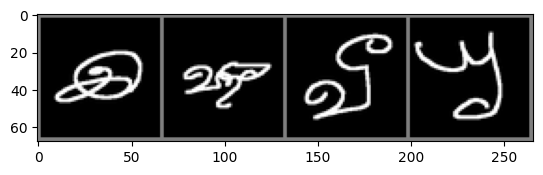

    இ    ஹு    வீ    யூ


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [ ]:
def initialize_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        nn.init.zeros_(m.bias)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.conv5 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(64)
        self.conv6 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 8 * 8, 1024)
        self.bn7 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.bn8 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 156)
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool1(F.relu(self.bn4(self.conv4(x))))
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool1(F.relu(self.bn6(self.conv6(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.bn7(self.fc1(x)))
        x = F.relu(self.bn8(self.fc2(x)))
        x = self.fc3(x)
        return x

net = Net()
net.apply(initialize_weights)
net.to(device)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), weight_decay=0.003, lr=0.001)

<ipython-input-4-e367c21ebad4>:11: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  com = ndimage.measurements.center_of_mass(arr)


[1,   100] loss: 0.428
[1,   200] loss: 0.444
[1,   300] loss: 0.452
[1,   400] loss: 0.468
[1,   500] loss: 0.451
[1,   600] loss: 0.447
EPOCH 1
Training loss: 0.44725468013716196
Training accuracy: 88.94095595126522%
Validation loss: 0.4592977362741224
Validation accuracy: 88.65542073591793%
----------------------------------------------------
[2,   100] loss: 0.382
[2,   200] loss: 0.404
[2,   300] loss: 0.400
[2,   400] loss: 0.425
[2,   500] loss: 0.419
[2,   600] loss: 0.409
EPOCH 2
Training loss: 0.406558684073067
Training accuracy: 90.22838257781285%
Validation loss: 0.4339382310490807
Validation accuracy: 88.98096083653941%
----------------------------------------------------
[3,   100] loss: 0.365
[3,   200] loss: 0.402
[3,   300] loss: 0.385
[3,   400] loss: 0.396
[3,   500] loss: 0.391
[3,   600] loss: 0.379
EPOCH 3
Training loss: 0.3871266954670659
Training accuracy: 90.8005721896118%
Validation loss: 0.4149771059383781
Validation accuracy: 90.10555391141364%
-------------

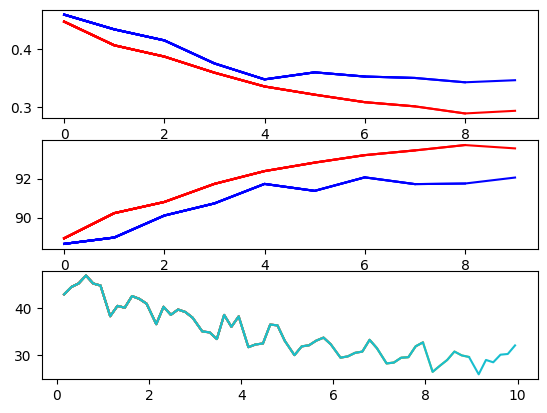

In [ ]:
x = []
train_loss = []
val_loss = []
train_accuracy = []
val_accuracy = []
fig, axs = plt.subplots(3)

x_two = []
running_losses = []

for epoch in range(10):
    x.append(epoch)

    curr_train_loss = 0.0
    train_total = 0
    train_correct = 0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        curr_train_loss += loss.item()

        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_losses.append(running_loss)
            x_two.append(epoch + i * 64 / len(trainset))
            running_loss = 0.0

    train_loss.append(curr_train_loss / len(trainset) * 64)
    train_accuracy.append(100 * train_correct / train_total)

    val_correct = 0
    val_total = 0
    curr_val_loss = 0.0
    with torch.no_grad():
        for data in valloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
            curr_val_loss += criterion(outputs, labels).item()
    val_loss.append(curr_val_loss / len(valset) * 64)
    val_accuracy.append(100 * val_correct / val_total)

    print('EPOCH ' + str(epoch + 1))
    print('Training loss: ' + str(train_loss[-1]))
    print('Training accuracy: ' + str(train_accuracy[-1]) + "%")
    print('Validation loss: ' + str(val_loss[-1]))
    print('Validation accuracy: ' + str(val_accuracy[-1]) + "%")
    print('----------------------------------------------------')


    axs[0].plot(x, train_loss, 'r-', val_loss, 'b-')
    axs[1].plot(x, train_accuracy, 'r-', val_accuracy, 'b-')
    axs[2].plot(x_two, running_losses)

<ipython-input-4-e367c21ebad4>:11: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  com = ndimage.measurements.center_of_mass(arr)


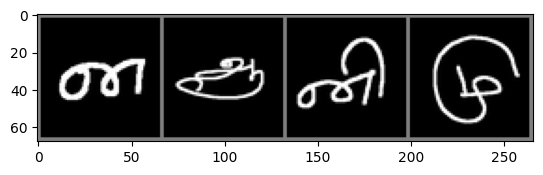

GroundTruth:      ன     ஆ    னி    மு


In [ ]:
dataiter = iter(testloader)
data_thing = next(dataiter)
images, labels = data_thing[0].to(device), data_thing[1].to(device)

imgs = images.cpu()
imshow(torchvision.utils.make_grid(imgs[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
outputs = net(images[:4])
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:      ன    சூ    ளி    மு


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))

<ipython-input-4-e367c21ebad4>:11: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  com = ndimage.measurements.center_of_mass(arr)


Accuracy of the network on the 10000 test images: 89.838817 %


In [ ]:
torch.save(net.state_dict(), 'mic0101OCRchkptmodel.pt')


# TESTING CODE


In [ ]:
from PIL import Image, ImageOps, ImageFilter
import numpy as np
from scipy import ndimage
from torchvision import datasets, transforms
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/processed.zip"

Streaming output truncated to the last 5000 lines.
  inflating: processed/train/86/086u111t02.tiff  
  inflating: processed/train/86/086u112t01.tiff  
  inflating: processed/train/86/086u112t02.tiff  
  inflating: processed/train/86/086u114t01.tiff  
  inflating: processed/train/86/086u114t02.tiff  
  inflating: processed/train/86/086u115t01.tiff  
  inflating: processed/train/86/086u115t02.tiff  
  inflating: processed/train/86/086u116t01.tiff  
  inflating: processed/train/86/086u116t02.tiff  
  inflating: processed/train/86/086u117t01.tiff  
  inflating: processed/train/86/086u117t02.tiff  
  inflating: processed/train/86/086u118t01.tiff  
  inflating: processed/train/86/086u118t02.tiff  
  inflating: processed/train/86/086u120t01.tiff  
  inflating: processed/train/86/086u120t02.tiff  
  inflating: processed/train/86/086u121t01.tiff  
  inflating: processed/train/86/086u121t02.tiff  
  inflating: processed/train/86/086u122t01.tiff  
  inflating: processed/train/86/086u122t02.tiff  

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
class Process(object):
    def __call__(self, img):
        converted = img.convert("L")
        inverted = ImageOps.invert(converted)
        thick = inverted.filter(ImageFilter.MaxFilter(5))
        ratio = 48.0 / max(thick.size)
        new_size = tuple([int(round(x*ratio)) for x in thick.size])
        res = thick.resize(new_size, Image.LANCZOS)

        arr = np.asarray(res)
        com = ndimage.measurements.center_of_mass(arr)
        result = Image.new("L", (64, 64))
        box = (int(round(32.0 - com[1])), int(round(32.0 - com[0])))
        result.paste(res, box)
        return result
def initialize_weights(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        nn.init.kaiming_normal_(m.weight)
        nn.init.zeros_(m.bias)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 16, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 32, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(32)
        self.conv5 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(64)
        self.conv6 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(64 * 8 * 8, 1024)
        self.bn7 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.bn8 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 156)
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool1(F.relu(self.bn4(self.conv4(x))))
        x = F.relu(self.bn5(self.conv5(x)))
        x = self.pool1(F.relu(self.bn6(self.conv6(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.bn7(self.fc1(x)))
        x = F.relu(self.bn8(self.fc2(x)))
        x = self.fc3(x)
        return x
net = Net()
net.apply(initialize_weights)
net.to(device)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (

In [ ]:
transform = transforms.Compose([Process(), transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
test_dir = '/content/processed/test'

testset = datasets.ImageFolder(test_dir, transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [ ]:
def get_tamil_classes(csv_path, testset):
    import pandas as pd

    df = pd.read_csv(csv_path, header=0)
    unicode_list = df["Unicode"].tolist()
    char_list = []

    for element in unicode_list:
        code_list = element.split()
        chars_together = ""
        for code in code_list:
            hex_str = "0x" + code
            char_int = int(hex_str, 16)
            character = chr(char_int)
            chars_together += character
        char_list.append(chars_together)

    classes = []
    for i in range(156):
        index = int(testset.classes[i])
        char = char_list[index]
        classes.append(char)

    return classes


In [ ]:
classes = get_tamil_classes('/content/TamilChar.csv', testset)

In [ ]:
from PIL import Image,ImageOps
import torchvision.transforms as transforms
import torch
import torch.nn.functional as F

# 🔧 Use the same transform as training
transform = transforms.Compose([
    Process(),                         # your custom preprocessing
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load model
net.load_state_dict(torch.load('/content/tamil_net.pt', map_location=torch.device('cpu')))
net.to(torch.device('cpu'))
net.eval()

image_path = "/content/pa_test_.JPG"  # Update with your test image path
img = Image.open(image_path)
img = transform(img)
img = img.unsqueeze(0)  # Add batch dimension

# Predict
with torch.no_grad():
    output = net(img)
    _, predicted = torch.max(output, 1)

# Print prediction
print("Predicted class index:", predicted.item())
print("Predicted character:", classes[predicted.item()])


<ipython-input-16-746abf8375b4>:11: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  com = ndimage.measurements.center_of_mass(arr)


Predicted class index: 69
Predicted character: ப
